## 1. About the task and dataset Consideration:

### 1.1. Dataset Creation:

In [5]:
import os,shutil
original_dataset_dir_1 = 'E:\\python_workspace\\test_jupy\\data_1\\dogscats\\train\\cats'
original_dataset_dir_2 = 'E:\\python_workspace\\test_jupy\\data_1\\dogscats\\train\\dogs'
base_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small'

train_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\train'
validation_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\validation'
test_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\test'

train_cats_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\train\\cats'
train_dogs_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\train\\dogs'
validation_cats_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\validation\\cats'
validation_dogs_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\validation\\dogs'
test_cats_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\test\\cats'
test_dogs_dir = 'E:\\Anirban_Research\\Experimentation_beg\\cats_n_dogs_small\\test\\dogs'





### 1.2. Dataset size:


In [2]:
print('Total Training Cat Images: ',len(os.listdir(train_cats_dir)))
print('Total Traiing Dog Images: ',len(os.listdir(train_dogs_dir)))
print('Total Validation Cat Images: ',len(os.listdir(validation_cats_dir)))
print('Total Validation Dog Images: ',len(os.listdir(validation_dogs_dir)))
print('Total Test Cat Images: ',len(os.listdir(test_cats_dir)))
print('Total Test Dog Images: ',len(os.listdir(test_dogs_dir)))


Total Training Cat Images:  1000
Total Traiing Dog Images:  1000
Total Validation Cat Images:  500
Total Validation Dog Images:  500
Total Test Cat Images:  500
Total Test Dog Images:  500


### 1.3. Initial Dependencies:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 2. Building the Model:

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## 3. Configuring the model for training:

In [8]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=1),keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True)]
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

## 4. Data Pre-Processing:

### 4.1. Using ImageDataGenerator to read images from directories:

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size = 20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 5. Fitting the model using Batch Generator:


In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,callbacks=callbacks_list,validation_data=validation_generator,validation_steps=50)


Epoch 1/30
100/100 [==============================] - 256s 3s/step - loss: 0.6932 - acc: 0.5345 - val_loss: 0.6764 - val_acc: 0.5570
Epoch 2/30
100/100 [==============================] - 251s 3s/step - loss: 0.6609 - acc: 0.6020 - val_loss: 0.6595 - val_acc: 0.6060
Epoch 3/30
100/100 [==============================] - 258s 3s/step - loss: 0.6205 - acc: 0.6560 - val_loss: 0.6553 - val_acc: 0.6140
Epoch 4/30
100/100 [==============================] - 250s 2s/step - loss: 0.5695 - acc: 0.7095 - val_loss: 0.6830 - val_acc: 0.5930
Epoch 5/30
100/100 [==============================] - 251s 3s/step - loss: 0.5467 - acc: 0.7280 - val_loss: 0.6578 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 250s 3s/step - loss: 0.5151 - acc: 0.7505 - val_loss: 0.6071 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 250s 2s/step - loss: 0.4941 - acc: 0.7540 - val_loss: 0.5771 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 250s 3s/step - 

## 6. Saving the model:

In [12]:
model.save('cats_n_dogs_small_3.h5')

## 7. Plotting model's loss and accuracy on training and validation set:

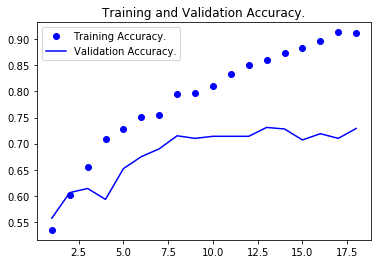

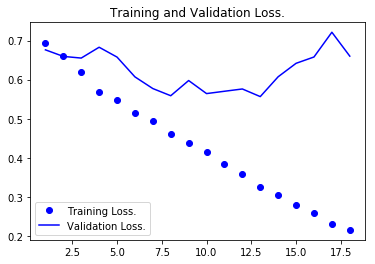

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training Accuracy.')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy.')
plt.title('Training and Validation Accuracy.')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training Loss.')
plt.plot(epochs,val_loss,'b',label='Validation Loss.')
plt.title('Training and Validation Loss.')
plt.legend()

plt.show()


## 8. Re-Building Model using Data-Augmentation Drop-Out technique for mitigating Over-fitting:

In [3]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(128,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512,activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

model_1.summary()

model_1.compile(loss='binary_crossentropy',optimizer = optimizers.RMSprop(lr=1e-4),metrics = ['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## 9. Training the model using data-augmentation generator:

In [7]:
train_datagen_1 = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen_1 = ImageDataGenerator(rescale=1./255)
train_generator_1 = train_datagen_1.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode = 'binary')
validation_generator_1 = test_datagen_1.flow_from_directory(validation_dir,target_size=(150,150),batch_size=32,class_mode='binary')

callbacks_list_ = [keras.callbacks.EarlyStopping(monitor='acc',patience=1),keras.callbacks.ModelCheckpoint(filepath='my_model_.h5',monitor='val_loss',save_best_only=True)]

history_1 = model_1.fit_generator(train_generator_1,steps_per_epoch=100,epochs=50,callbacks=callbacks_list_,validation_data=validation_generator_1,validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 403s 4s/step - loss: 0.6937 - acc: 0.5206 - val_loss: 0.6778 - val_acc: 0.5730
Epoch 2/50
100/100 [==============================] - 401s 4s/step - loss: 0.6814 - acc: 0.5681 - val_loss: 0.6712 - val_acc: 0.5818
Epoch 3/50
100/100 [==============================] - 400s 4s/step - loss: 0.6669 - acc: 0.5866 - val_loss: 0.6405 - val_acc: 0.6402
Epoch 4/50
100/100 [==============================] - 400s 4s/step - loss: 0.6599 - acc: 0.5972 - val_loss: 0.6469 - val_acc: 0.5876
Epoch 5/50
100/100 [==============================] - 399s 4s/step - loss: 0.6314 - acc: 0.6278 - val_loss: 0.5973 - val_acc: 0.6574
Epoch 6/50
100/100 [==============================] - 400s 4s/step - loss: 0.6264 - acc: 0.6450 - val_loss: 0.5826 - val_acc: 0.6901
Epoch 7/50
100/100 [==============================] - 399s 4s/step - loss: 0.6065 - acc: 0.6706 - val_loss: 0.5743 - v

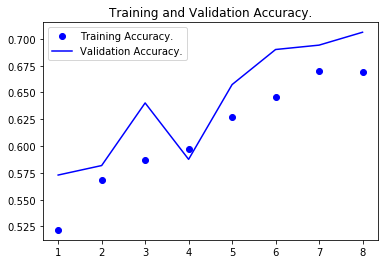

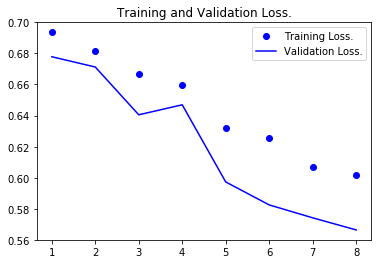

In [9]:
acc_ = history_1.history['acc']
val_acc_ = history_1.history['val_acc']
loss_ = history_1.history['loss']
val_loss_ = history_1.history['val_loss']

epochs = range(1,len(acc_) + 1)

plt.plot(epochs,acc_,'bo',label='Training Accuracy.')
plt.plot(epochs,val_acc_,'b',label='Validation Accuracy.')
plt.title('Training and Validation Accuracy.')
plt.legend()

plt.figure()

plt.plot(epochs,loss_,'bo',label='Training Loss.')
plt.plot(epochs,val_loss_,'b',label='Validation Loss.')
plt.title('Training and Validation Loss.')
plt.legend()

plt.show()